# ITP11701
# Lab Session 04 : Logistic Regression & Softmax Classification

#### File name must be **aip2_lab4_student_id.ipynb**, example: **aip2_lab4_20250000.ipynb**
#### Fill in the blanks in the following cells and submit the notebook file

**YongHun Lee**, 2025-05-07

# 1. Data information

In [1]:
#Import the datasets from sklearn module
from sklearn import datasets
iris=datasets.load_iris()

#The iris data contain following information-
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
for key in ['DESCR', 'target_names', 'feature_names']:
    print(key, iris[key])

DESCR .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classe

In [3]:
print("IRIS data shape:", iris.data.shape)
print("IRIS target shape:", iris.target.shape)

IRIS data shape: (150, 4)
IRIS target shape: (150,)


In [4]:
print(iris.data)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## 2. Logistic Regression

In [5]:
# Import the functions for logistic regression from sklearn module
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Binary classification(logistic regression) (using 2 features)

For binary classification, we will classify the iris dataset into two classes: Virginica and non-Virginica. We will use the last two features of the dataset (petal length and petal width) for this classification task.

In [7]:
# First we will create a binary target (0 or 1) for Virginica and non-Virginica
# Target names: ['setosa' 'versicolor' 'virginica']
# Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y = (iris['target'] == 2)*1 # Fill in the blank

# Use petal length and petal width as features
X = iris['data'][:,2:] # Fill in the blank

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X,y)# Fill in the blank

LogisticRegression()

In [8]:
log_reg.intercept_, log_reg.coef_

(array([-17.55616979]), array([[2.77983942, 2.38388751]]))

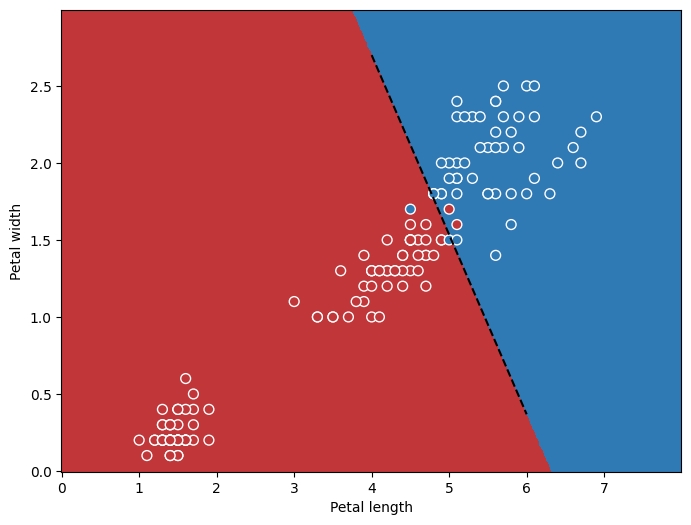

In [9]:
# 2-dimensional coordinate.
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Define size of figure
plt.figure(1, figsize = (8, 6))
# To see decision boundary, predicted value for each points are colored
plt.pcolormesh(xx, yy, Z, cmap = "RdBu"
               ,vmin = -.2 , vmax = 1.2)
# Plot Datapoints with corresponding color
plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin= -.2, vmax=1.2,
           edgecolor="white", linewidth=1)
# Labeling axis
plt.xlabel("Petal length")
plt.ylabel("Petal width")
# Add decision boundary with coef and intercept
xx = np.linspace(4, 6.)
yy = -(log_reg.intercept_[0] + log_reg.coef_[0][0] * xx) / log_reg.coef_[0][1]
plt.plot(xx, yy, "k--", label = "Decision Boundary")
plt.show()

In [10]:
# Calculate the accuracy of the model
predictions = log_reg.predict(X) # Fill in the blank
accuracy = (np.sum(predictions == y)) / len(y)# Fill in the blank
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### 2.2 Binary classification(logistic regression) (using 4 features)

**Setosa vs non-setosa** classification using all four features of the iris dataset.

In [21]:
# Target names: ['setosa' 'versicolor' 'virginica']
# Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Use 4 features: sepal width, sepal length, petal width and petal length
"""
TODO:
1. Create a binary target (0 or 1) for Setosa and non-Setosa
2. Use 4 features: sepal width, sepal length, petal width and petal length
3. Define classifier name "lr"
4. Fit the model to the data
5. Calculate the accuracy of the model
"""
y = (iris['target'] == 2)*1
X = iris['data']

# Create a logistic regression model
lr = LogisticRegression()

# Fit the model to the data
lr.fit(X,y)

predictions = lr.predict(X) # Fill in the blank
accuracy = (np.sum(predictions == y)) / len(y)# Fill in the blank






print("Accuracy:" , accuracy)

Accuracy: 0.9733333333333334


### 2.3 Multi-class classification(logistic regression) (using 2 features)

For multi-class classification, we will classify the iris dataset into three classes: Setosa, Versicolor, and Virginica. We will use the last two features of the dataset (petal length and petal width) for this classification task.

In [11]:
# Classify all three species of iris
# Target names: ['setosa' 'versicolor' 'virginica']
# Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y = iris['target']# Fill in the blank
# Use petal length and petal width as features
X = iris['data'][:,2:] # Fill in the blank

In [14]:
# Create a logistic regression model
multi_log_reg = LogisticRegression(multi_class = 'multinomial') # Fill in the blank

# Fit the model to the data
multi_log_reg.fit(X,y) # Fill in the blank

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

$softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$

In [15]:
predict_prob = multi_log_reg.predict_proba(X)
print("Predicted probabilities:\n", predict_prob[:5])
sum_predict_prob = np.sum(predict_prob, axis=1)
print("Sum of predicted probabilities:\n", sum_predict_prob[:5])

Predicted probabilities:
 [[9.79813976e-01 2.01859922e-02 3.16482113e-08]
 [9.79813976e-01 2.01859922e-02 3.16482113e-08]
 [9.84715309e-01 1.52846724e-02 1.85136327e-08]
 [9.73383416e-01 2.66165302e-02 5.40149611e-08]
 [9.79813976e-01 2.01859922e-02 3.16482113e-08]]
Sum of predicted probabilities:
 [1. 1. 1. 1. 1.]


In [16]:
# 2-dimensional coordinate.
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))
Z = multi_log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Petal width')

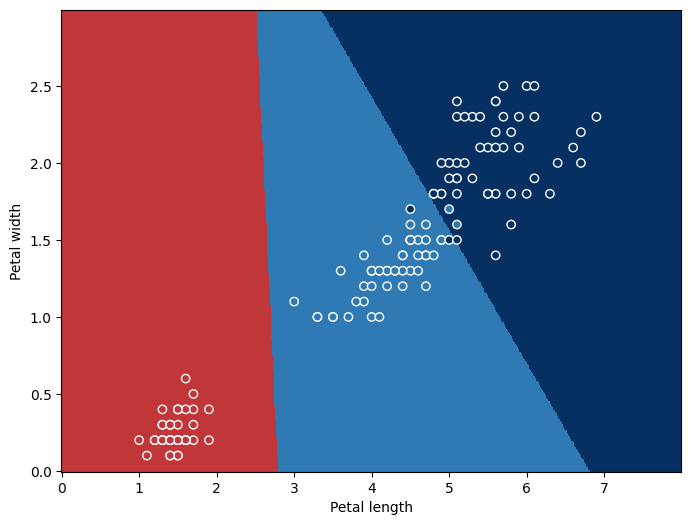

In [17]:
Z = Z.reshape(xx.shape)
# Define size of figure
plt.figure(1, figsize=(8, 6))
# To see decision boundary, predicted value for each points are colored
plt.pcolormesh(xx, yy, Z,  cmap="RdBu"
               ,vmin=-.2, vmax=1.2)
# Plot Datapoints with corresponding color
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdBu"
            ,vmin=-.2, vmax=1.2
            ,edgecolor="white", linewidth=1)
# Labeling axis
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [18]:
# Get accuracy of each class

predictions = multi_log_reg.predict(X)
for i in range(3):
    # 1-vs-rest accuracy
    class_pred = (predictions == i) * 1
    class_y = (y == i) * 1
    accuracy = np.sum(class_pred == class_y) / len(y)
    print(f"Accuracy for class {iris.target_names[i]}: {accuracy}")

Accuracy for class setosa: 1.0
Accuracy for class versicolor: 0.9666666666666667
Accuracy for class virginica: 0.9666666666666667


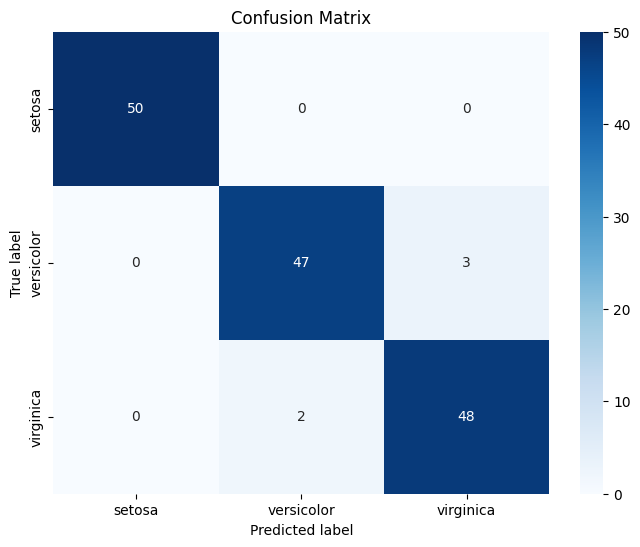

In [19]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix")
plt.show()

### 2.4 Multi-class classification(logistic regression) (using 4 features)

In [29]:
# Target names: ['setosa' 'versicolor' 'virginica']
# Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Use 4 features: sepal width, sepal length, petal width and petal length
"""
TODO:
1. Use 3 targets: setosa, versicolor and virginica
2. Use 4 features: sepal width, sepal length, petal width and petal length
3. Define classifier name "multi_lr"
4. Fit the model to the data
5. Calculate the accuracy of the each class
"""
y = iris['target']
X = iris['data']
multi_lr = LogisticRegression(multi_class = 'multinomial')

# Fit the model to the data
multi_lr.fit(X,y)



predictions = multi_lr.predict(X)
for i in range(3):
    # 1-vs-rest accuracy
    class_pred = (predictions == i) * 1
    class_y = (y == i) * 1
    accuracy = np.sum(class_pred == class_y) / len(y)
    print(f"Accuracy for class {iris.target_names[i]}: {accuracy}")

Accuracy for class setosa: 1.0
Accuracy for class versicolor: 0.9733333333333334
Accuracy for class virginica: 0.9733333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.5 Multi-class classification(MLP classifier)

In [23]:
# Classify all three species of iris with MLP classifier
y = iris["target"]
X = iris["data"]

In [24]:
from sklearn.neural_network import MLPClassifier

classifier_MLP = MLPClassifier(activation = 'relu', solver= 'lbfgs')
classifier_MLP.fit(X, y)
classifier_MLP.score(X, y)

0.9866666666666667